### EXPLORING DATA

In [1]:
import pandas as pd

df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### MODELLING

In [6]:
df_churn = df.copy()

In [7]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

In [8]:
df_churn.isna().sum()                  #11 values as NaN so drop it

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df_churn.dropna(how='any', inplace=True)

In [10]:
df_churn.drop(columns=['customerID'], axis=1, inplace=True)

In [11]:
df_churn['tenure'].max()                    #We will separate per years

72

In [12]:
def year_separation(months):
    if months>=1 and months<12:
        return 1
    elif months>=13 and months<24:
        return 2
    elif months>=25 and months<36:
        return 3
    elif months>=37 and months<48:
        return 4
    elif months>=48 and months<60:
        return 5
    else:
        return 6

df_churn['tenure_year'] = df_churn['tenure'].apply(year_separation)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_year
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [13]:
#We dont need tenure column anymore
df_churn.drop(columns=['tenure'], axis=1, inplace=True)

### DATA VISUALIZATION

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

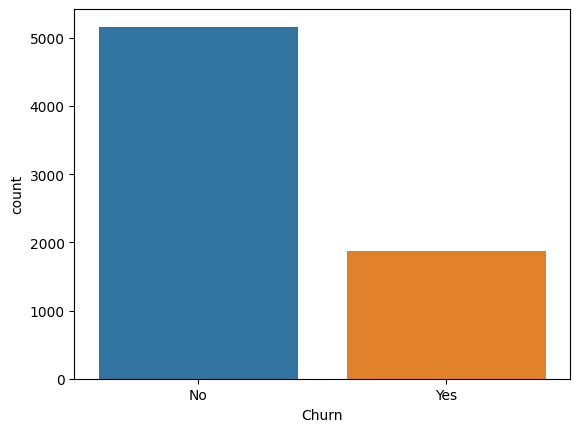

In [15]:
sns.countplot(data=df_churn, x='Churn')
plt.show()

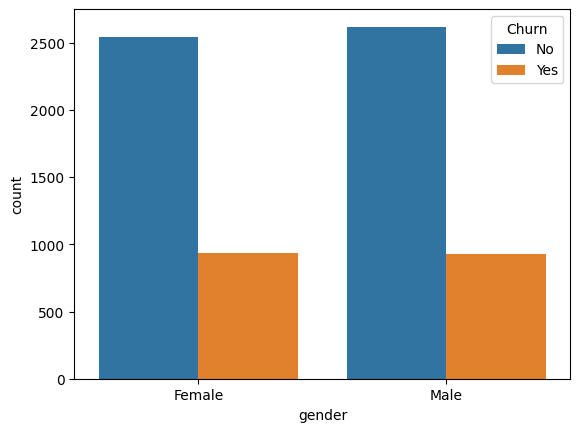

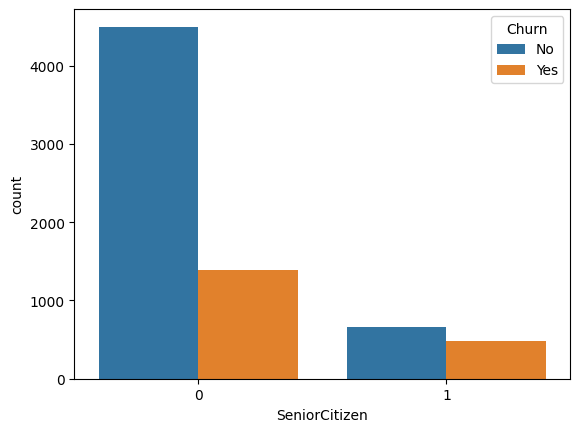

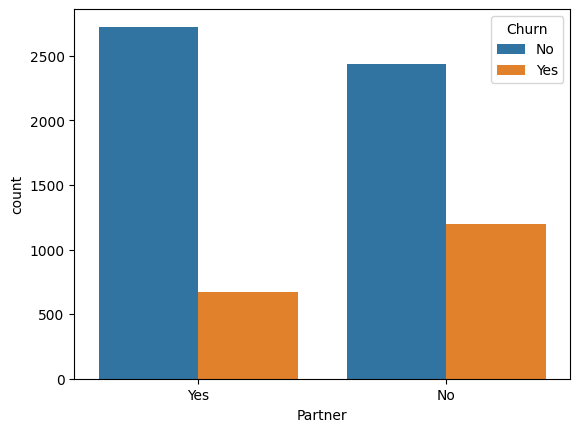

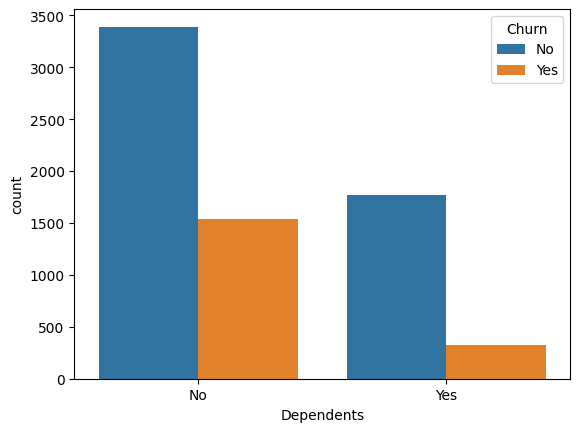

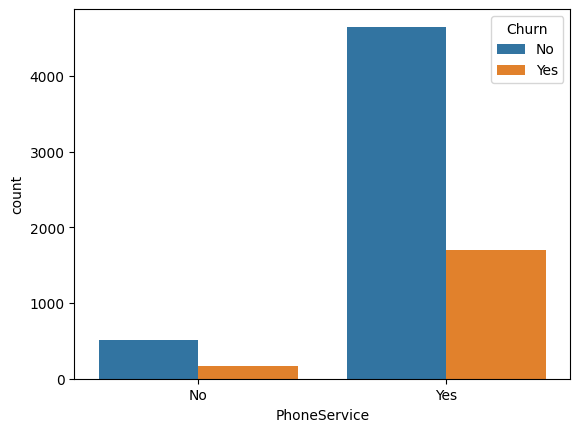

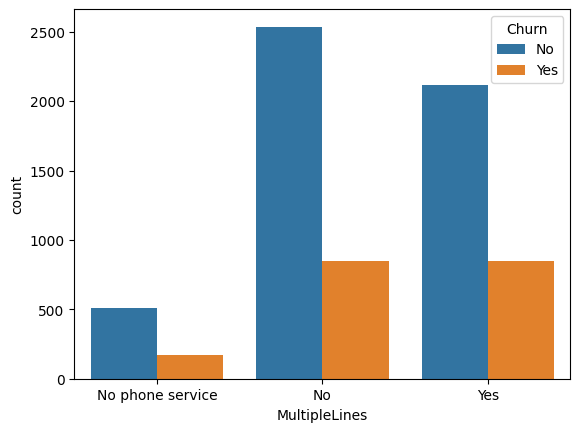

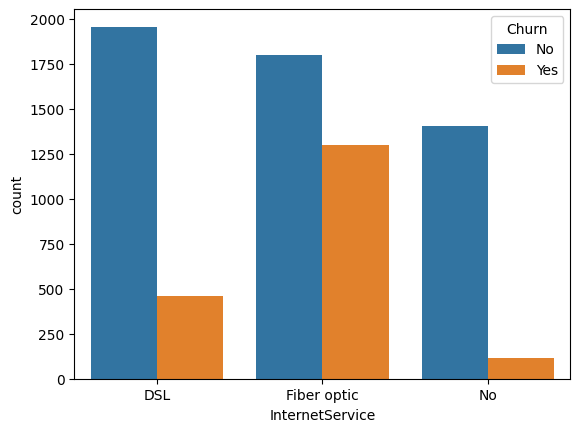

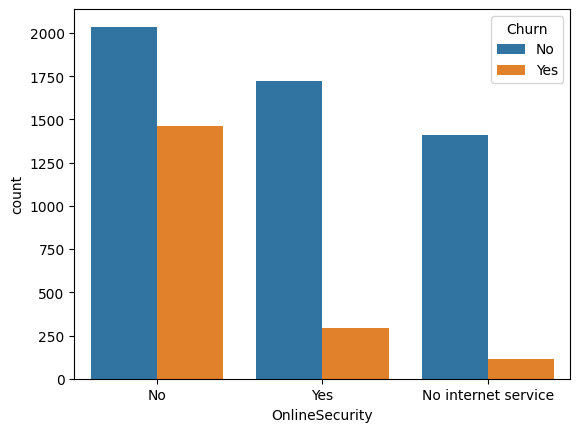

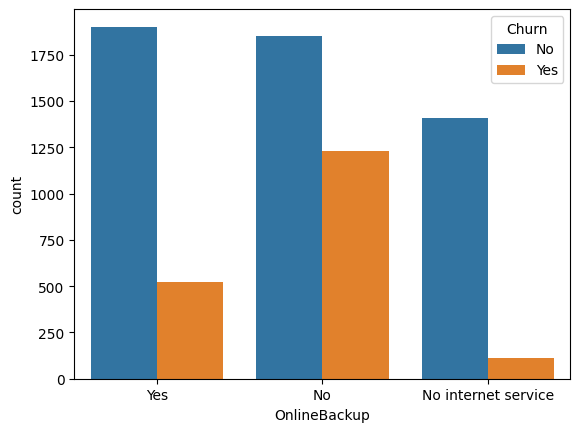

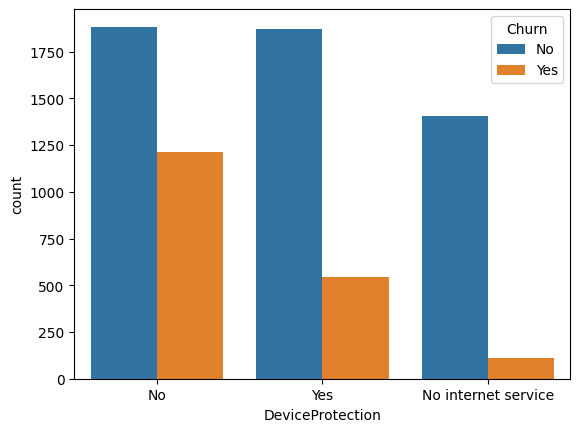

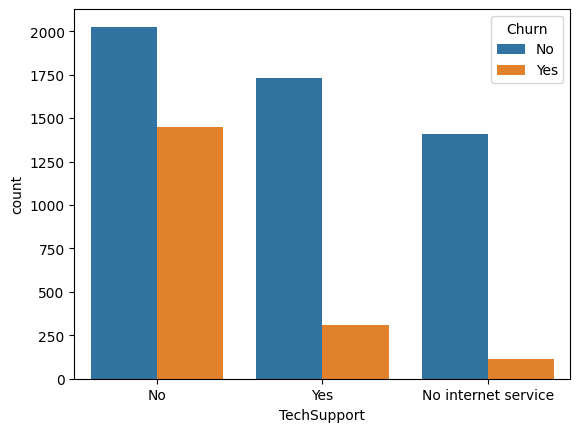

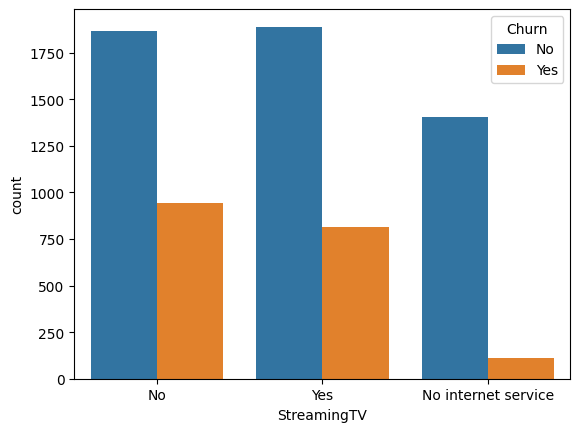

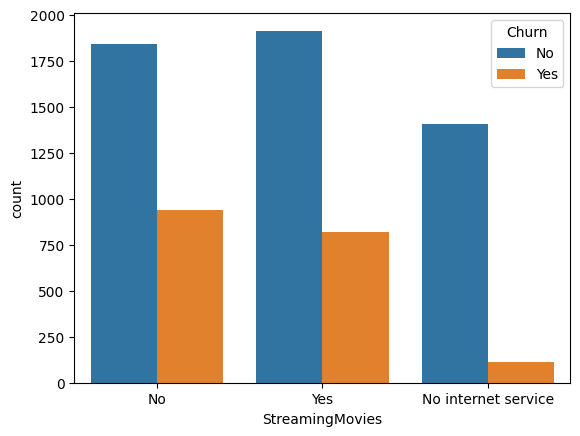

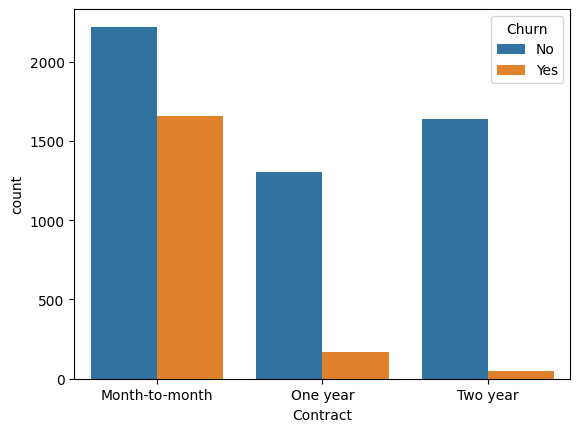

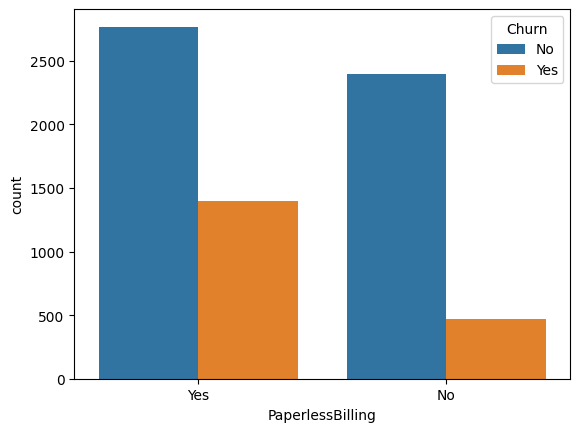

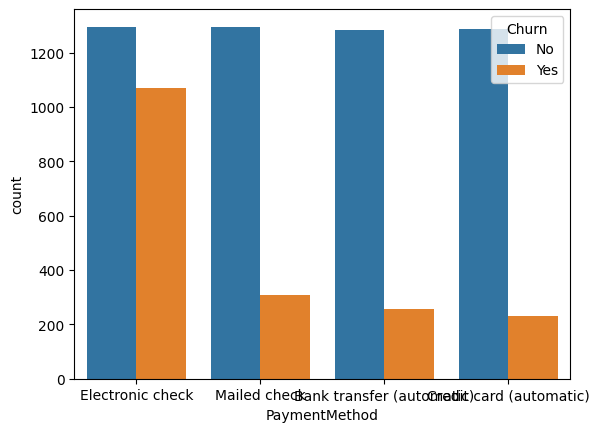

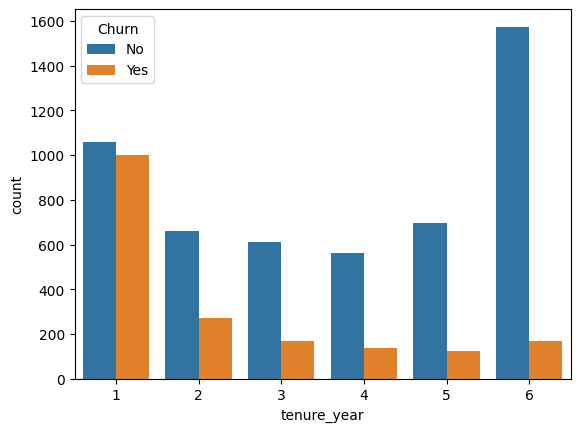

In [16]:
for i, predictor in enumerate(df_churn.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_churn, x=predictor, hue='Churn')

Text(0.5, 1.0, 'Monthly charges by churn')

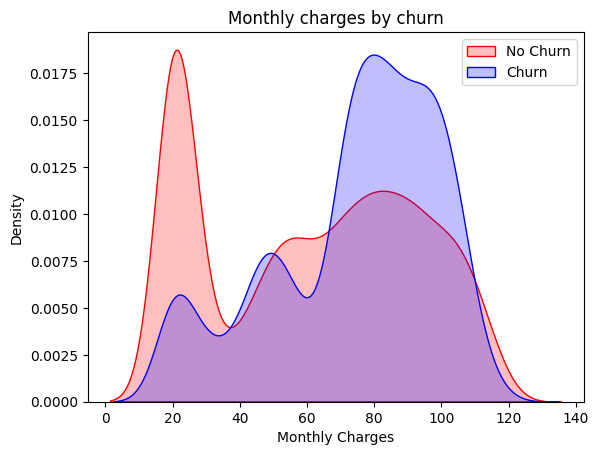

In [17]:
Mth = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 'No') ],
                color="Red", fill=True)
Mth = sns.kdeplot(df_churn.MonthlyCharges[(df_churn["Churn"] == 'Yes') ],
                ax =Mth, color="Blue", fill=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

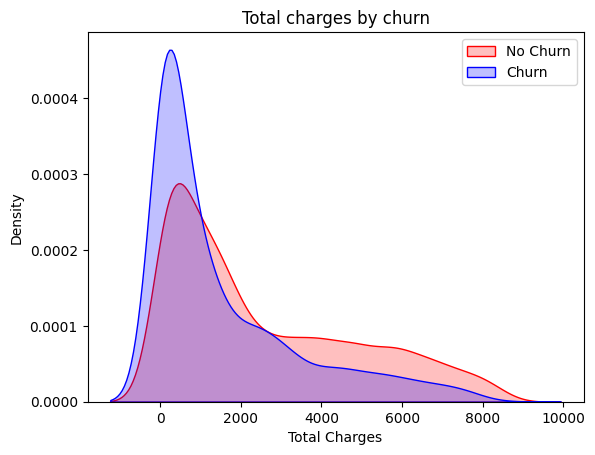

In [18]:
Tot = sns.kdeplot(df_churn.TotalCharges[(df_churn["Churn"] == 'No') ],
                color="Red", fill = True)
Tot = sns.kdeplot(df_churn.TotalCharges[(df_churn["Churn"] == 'Yes') ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

### Categorical to Numerical

In [19]:
def change(value):
    if value=='Yes':
        return 1
    else:
        return 0

df_churn['Churn'] = df_churn['Churn'].apply(change)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_year
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,3
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,4
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


### MODEL BUILDING

In [20]:
df_churn_dummies = pd.get_dummies(df_churn)

In [21]:
x = df_churn_dummies.drop(columns='Churn', axis=1)
y = df_churn_dummies['Churn']

##### TRAIN TEST SPLIT

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [25]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
y_pred = model_rf.predict(x_test)

In [27]:
metrics.accuracy_score(y_test, y_pred)

0.7853589196872779

In [28]:
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1017
           1       0.65      0.48      0.55       390

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.79      0.77      1407



In [29]:
res = SMOTEENN()
x_resampled, y_resampled = res.fit_resample(x,y)

In [30]:
x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [31]:
model_rf_res = RandomForestClassifier()

In [32]:
model_rf_res.fit(x_res_train,y_res_train)

RandomForestClassifier()

In [33]:
y_res_predict = model_rf_res.predict(x_res_test)

In [34]:
metrics.accuracy_score(y_res_test, y_res_predict)

0.9553264604810997

In [35]:
print(metrics.classification_report(y_res_test, y_res_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       526
           1       0.95      0.97      0.96       638

    accuracy                           0.96      1164
   macro avg       0.96      0.95      0.95      1164
weighted avg       0.96      0.96      0.96      1164



In [36]:
cm =metrics.confusion_matrix(y_res_test, y_res_predict)
cm

array([[496,  30],
       [ 22, 616]], dtype=int64)

Well, our first random forest model got a lower avg accuracy (0.79) since we didn't have enough data with Churn = 1. This info can be confirmed by precision, recall and f1 values.
For that reason, we need more data to Churn = 1 samples in order to get a better results. 
We use SMOTEENN to resample to get more number of samples in the minority class (Churn=1), then we got an 0.96 acc with good values in recall, precision and f1.

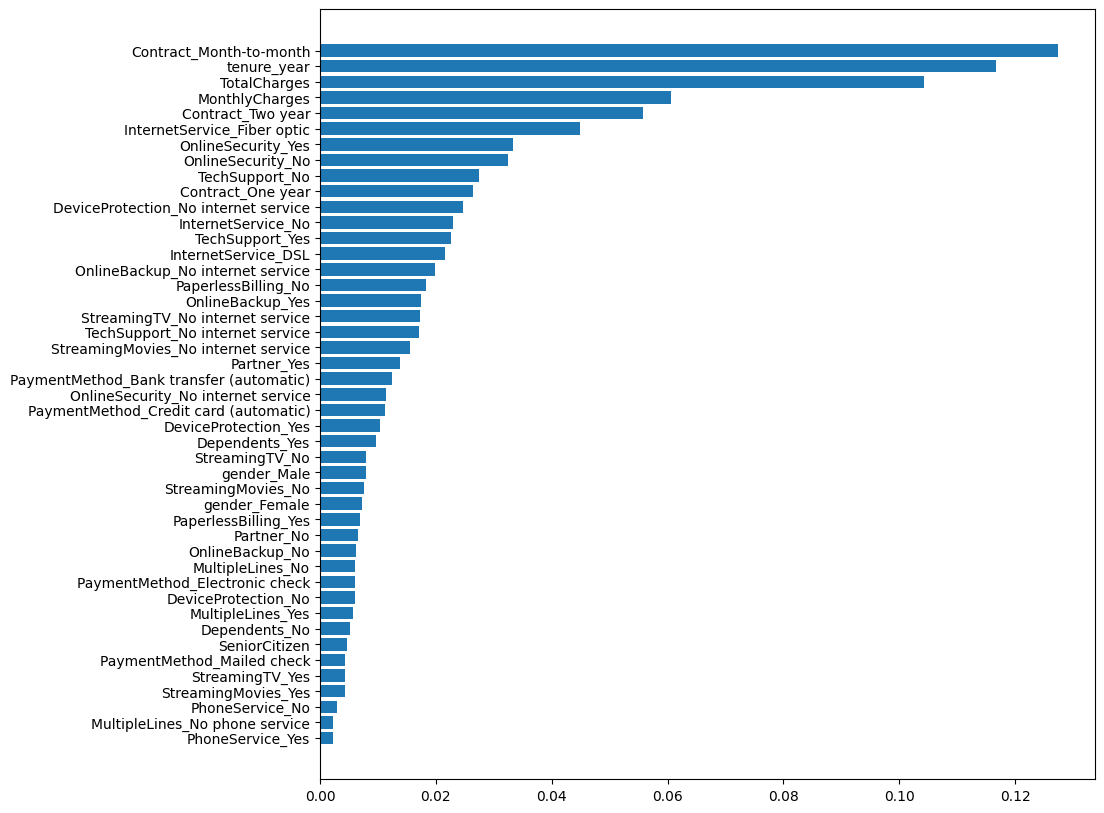

In [37]:
f_i = list(zip(x_resampled.columns, model_rf_res.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.figure(figsize=(10,10))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

We got that tenure_year, totalcharges, contract_types, monthly charges and internet services have better importance than others from random forest model

### USE SPECIFIC FEATURES

In [38]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_year'],
      dtype='object')

In [39]:
#SELECT FEATURES
df_selected_feat = df_churn[['tenure_year','MonthlyCharges', 'TotalCharges','Contract', 'InternetService', 'Churn']]

In [40]:
df_selected_feat.columns

Index(['tenure_year', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'InternetService', 'Churn'],
      dtype='object')

In [41]:
#CATEGORICAL TO NUMERICAL
df_feats_dummis = pd.get_dummies(df_selected_feat)
df_feats_dummis.head()

,tenure_year,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,29.85,29.85,0,1,0,0,1,0,0
1,3,56.95,1889.50,0,0,1,0,1,0,0
2,1,53.85,108.15,1,1,0,0,1,0,0
3,4,42.30,1840.75,0,0,1,0,1,0,0
4,1,70.70,151.65,1,1,0,0,0,1,0


In [42]:
x_feat = df_feats_dummis.drop(columns='Churn', axis=1)
y_feat = df_feats_dummis['Churn']

In [43]:
#RESAMPLING DATA
res = SMOTEENN()
x_feat_resampled, y_feat_resampled = res.fit_resample(x_feat,y_feat)

In [44]:
x_feat_train, x_feat_test, y_feat_train, y_feat_test = train_test_split(x_feat_resampled, y_feat_resampled, test_size=0.2)

In [45]:
model_rf = RandomForestClassifier()

In [46]:
model_rf.fit(x_feat_train,y_feat_train)

RandomForestClassifier()

In [47]:
y_feat_pred = model_rf.predict(x_feat_test)
metrics.accuracy_score(y_feat_test,y_feat_pred)

0.9655172413793104

In [48]:
print(metrics.classification_report(y_feat_test, y_feat_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       523
           1       0.97      0.96      0.97       579

    accuracy                           0.97      1102
   macro avg       0.97      0.97      0.97      1102
weighted avg       0.97      0.97      0.97      1102



We got a slightly better result, but now we only use a few features

### XGBOOST

In [49]:
from xgboost import XGBClassifier

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [51]:
model_xg = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, objective='binary:logistic')

In [52]:
model_xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [53]:
y_pred = model_xg.predict(x_test)

In [54]:
metrics.accuracy_score(y_test,y_pred)

0.8180525941719972

In [55]:
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1049
           1       0.68      0.55      0.60       358

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



In [56]:
res = SMOTEENN()
x_resampled, y_resampled = res.fit_resample(x,y)

In [57]:
x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [58]:
model_xg_res = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, objective='binary:logistic')

In [59]:
model_xg_res.fit(x_res_train, y_res_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [60]:
y_res_pred = model_xg_res.predict(x_res_test)

In [61]:
print(metrics.classification_report(y_res_test, y_res_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       521
           1       0.93      0.97      0.95       662

    accuracy                           0.94      1183
   macro avg       0.94      0.94      0.94      1183
weighted avg       0.94      0.94      0.94      1183



In [62]:
cm = metrics.confusion_matrix(y_res_test, y_res_pred)
cm

array([[475,  46],
       [ 23, 639]], dtype=int64)

We used two different model algorithms and random forest got a better result with 96% acc, for that reason we choose that one

### EXPORT MODEL

In [63]:
import pickle

In [64]:
#EXPORT ML MODEL AND ITS DATAFRAME

pickle.dump(model_rf,open('model.pkl','wb'))
pickle.dump(df_selected_feat, open('df.pkl', 'wb'))

In [68]:
df_selected_feat.columns

Index(['tenure_year', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'InternetService', 'Churn'],
      dtype='object')

In [69]:
df_selected_feat.head()

,tenure_year,MonthlyCharges,TotalCharges,Contract,InternetService,Churn
0,1,29.85,29.85,Month-to-month,DSL,0
1,3,56.95,1889.50,One year,DSL,0
2,1,53.85,108.15,Month-to-month,DSL,1
3,4,42.30,1840.75,One year,DSL,0
4,1,70.70,151.65,Month-to-month,Fiber optic,1
